<a href="https://colab.research.google.com/github/akashb023/bda-exp/blob/main/Copy_of_Untitled31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("large_sales_data (1).csv")

print("MEAN")
print(df[['Sales', 'Profit', 'Quantity']].mean())
print("\nMEDIAN")
print(df[['Sales', 'Profit', 'Quantity']].median())
print("\nMODE")
print(df[['Sales', 'Profit', 'Quantity']].mode().iloc[0])
print("\nSTANDARD DEVIATION")
print(df[['Sales', 'Profit', 'Quantity']].std())
print("\nVARIANCE")
print(df[['Sales', 'Profit', 'Quantity']].var())

MEAN
Sales       4976.694000
Profit       995.721667
Quantity      24.783667
dtype: float64

MEDIAN
Sales       4931.5
Profit       953.5
Quantity      25.0
dtype: float64

MODE
Sales       989.0
Profit      126.0
Quantity     15.0
Name: 0, dtype: float64

STANDARD DEVIATION
Sales       2862.260740
Profit      1144.578872
Quantity      14.093252
dtype: float64

VARIANCE
Sales       8.192537e+06
Profit      1.310061e+06
Quantity    1.986197e+02
dtype: float64


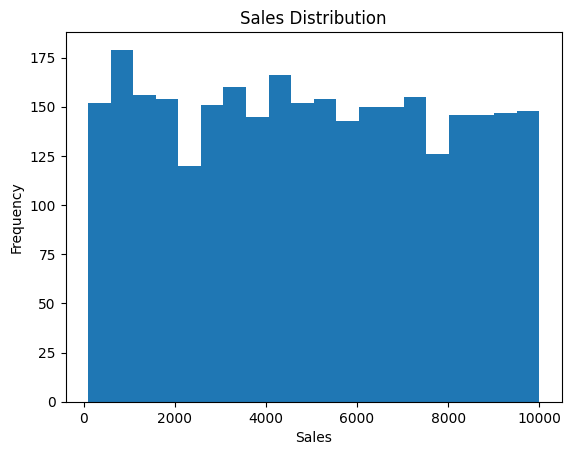

In [ ]:

plt.hist(df['Sales'], bins=20)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

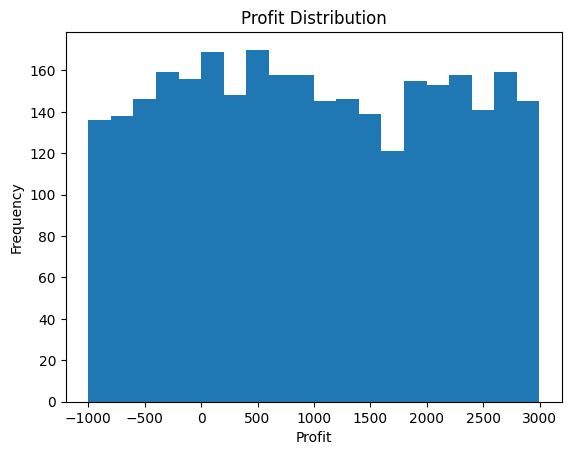

In [ ]:

plt.hist(df['Profit'], bins=20)
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

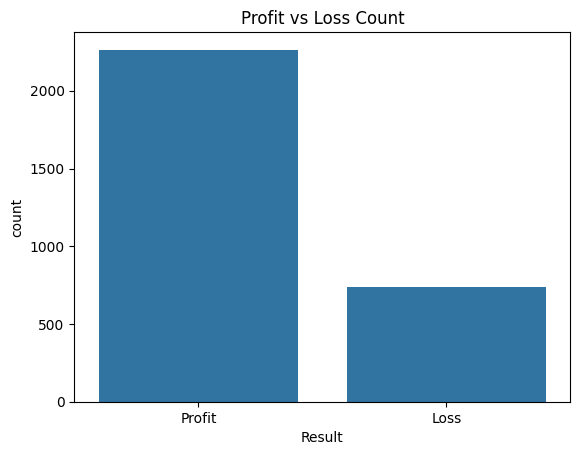

In [ ]:

df['Result'] = df['Profit'].apply(lambda x: 'Profit' if x > 0 else 'Loss')

sns.countplot(x='Result', data=df)
plt.title("Profit vs Loss Count")
plt.show()


Month-wise Sales and Profit
           Sales  Profit
Month                   
2024-01  3707482  763909
2024-02  3487176  689548
2024-03  3614820  701993
2024-04  3650140  730799
2024-05   470464  100916


Text(0, 0.5, 'Amount')

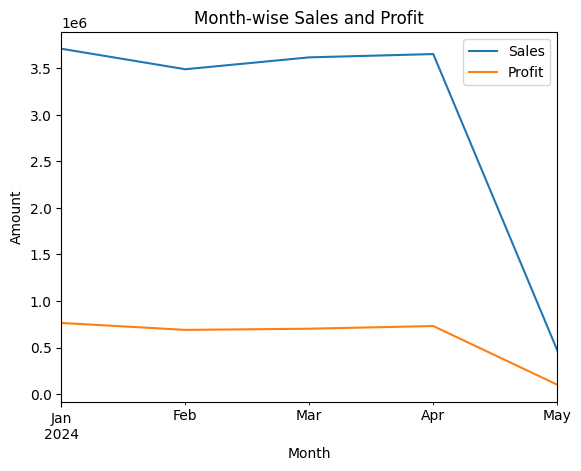

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

month_summary = df.groupby('Month')[['Sales', 'Profit']].sum()
print("\nMonth-wise Sales and Profit")
print(month_summary)

month_summary.plot()
plt.title("Month-wise Sales and Profit")
plt.xlabel("Month")
plt.ylabel("Amount")


Region-wise Profit
Region
Central    601881
East       600722
North      609495
South      582218
West       592849
Name: Profit, dtype: int64


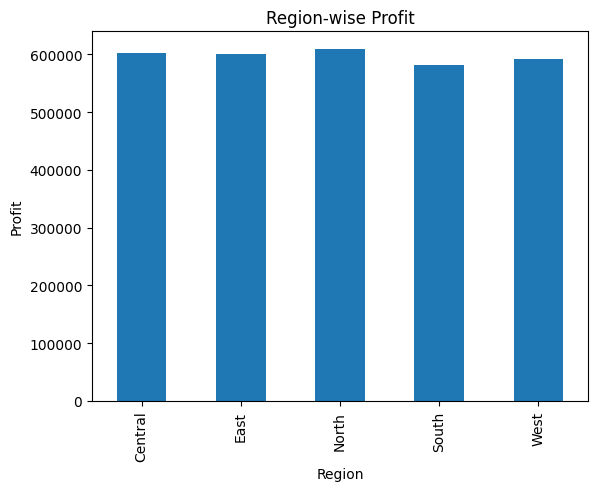

In [ ]:
region_profit = df.groupby('Region')['Profit'].sum()
print("\nRegion-wise Profit")
print(region_profit)

region_profit.plot(kind='bar')
plt.title("Region-wise Profit")
plt.ylabel("Profit")
plt.show()


Category-wise Profit
Category
Books          587500
Clothing       637215
Electronics    587155
Food           613939
Furniture      561356
Name: Profit, dtype: int64


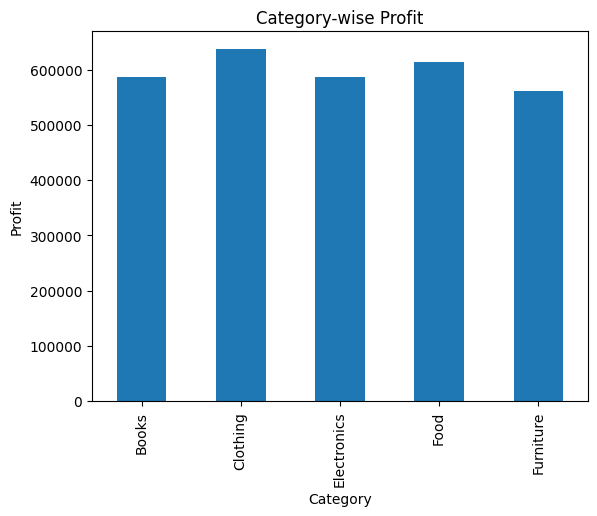

In [ ]:

category_profit = df.groupby('Category')['Profit'].sum()
print("\nCategory-wise Profit")
print(category_profit)

category_profit.plot(kind='bar')
plt.title("Category-wise Profit")
plt.ylabel("Profit")
plt.show()


Correlation Matrix
             Sales    Profit  Quantity
Sales     1.000000  0.032133 -0.006022
Profit    0.032133  1.000000  0.019923
Quantity -0.006022  0.019923  1.000000


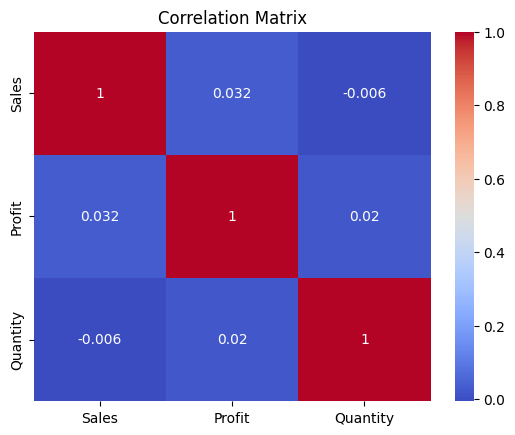

In [ ]:

print("\nCorrelation Matrix")
print(df[['Sales', 'Profit', 'Quantity']].corr())
sns.heatmap(df[['Sales', 'Profit', 'Quantity']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv("large_sales_data (1).csv")

X = df[["Quantity"]]
Y = df["Sales"]


model = LinearRegression()
model.fit(X, Y)


# Convert new_quantity to a DataFrame to maintain feature names and avoid the UserWarning
new_quantity = pd.DataFrame([[40]], columns=['Quantity'])
predicted_sales = model.predict(new_quantity)

print("Predicted Sales for Quantity = 40:", predicted_sales[0])

Predicted Sales for Quantity = 40: 4958.084636854771


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
